# Seguridad Vial

In [2]:
import pandas as pd
import numpy as np

In [47]:
import seaborn as sns

In [48]:
import matplotlib.pyplot as plt

In [67]:
pd.set_option('display.max_columns', None)

## Cargando datos

In [30]:
df = pd.read_csv('data/external/siniestros_individuales_conaset/individuales_biobio_2020.csv')

In [69]:
df.sample()

,X,Y,FID,COD_REG,REGION,CUT,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,LAT,LNG,VAL_COM,TIPO,Año,Idaccident,Fecha,Tipo_Accid,Tipo__CONA,Zona,Causa__CON,Causa,Fallecidos,Graves,Menos_Grav,Leves,Hora,fecha_hora,dow,hour
4430,-72.691502,-37.493878,4431,8,REGION BIO BIO,8306,NACIMIENTO,ALONSO DE RIVERA,,1532,"Alonso de Rivera, Avenida Julio Hemmelmann, Po...",-37.493878,-72.691502,1,node-highway-bus_stop,2020,1263296,2020/02/11,ATROPELLO,ATROPELLO,URBANA,IMPRUDENCIA DEL PEATON,PEATON CRUZA CALZADA FORMA SORPRESIVA O DESCUI...,0,1,0,0,20:15:00,2020-02-11 20:15:00,1,20


In [70]:
df['COMUNA']

0        CONCEPCION
1        TALCAHUANO
2           HUALPEN
3        CONCEPCION
4        CONCEPCION
           ...     
4477     CONCEPCION
4478    LOS ANGELES
4479        HUALPEN
4480     CONCEPCION
4481        HUALQUI
Name: COMUNA, Length: 4482, dtype: object

In [39]:
df['Fecha'] = df['Fecha'].apply(lambda x: x[:10])
df['fecha_hora'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora']) 

In [41]:
df['dow'] = df['fecha_hora'].dt.dayofweek

In [43]:
df['hour'] = df['fecha_hora'].dt.hour

In [52]:
heatmap_accidentes = pd.pivot_table(values = 'FID', index = 'hour', columns = 'dow', aggfunc = 'count', data = df)
heatmap_accidentes.fillna(0, inplace = True)

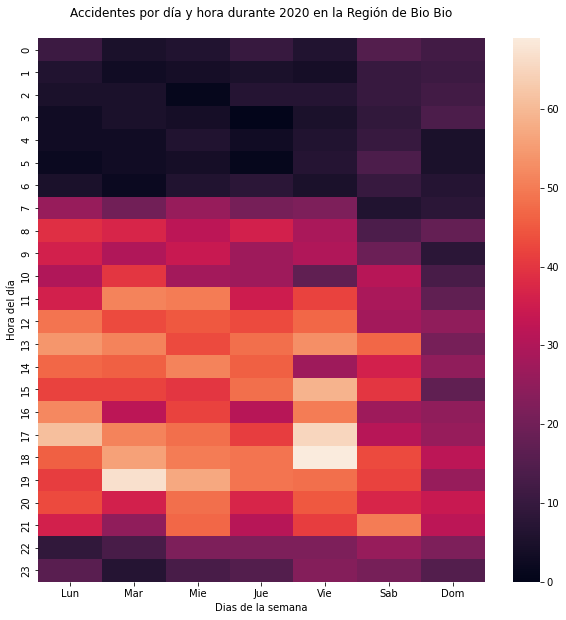

In [68]:
fig, ax = plt.subplots(1,1,figsize = (10, 10))
s = sns.heatmap(heatmap_accidentes, xticklabels=['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom'], ax = ax)
s.set(xlabel='Dias de la semana', ylabel='Hora del día')
s.set_title('Accidentes por día y hora durante 2020 en la Región de Bio Bio\n');